 🌟 [Online access to Addie Jasica's Data Science Final Tutorial.](https://ajasica.github.io/ "ajasica.github.io"). 🌟

![alt text](https://nccd.cdc.gov/TemplatePackage/3.0/css/lib/cdcmaps/images/hhs-cdc-logo.svg "CDC")



<p style="text-align: center; font-size: 25px; font-weight: bold;"> Deaths in Louisiana: An Analysis of Avilable Data </p>

<p style="text-align: center; font-weight:bold;">Addie Jasica</p>  


<p style="text-align: center;">Final Data Science Tutorial - CMPS 3660-02 - Introduction to Data Science - Professor Mattei</p>

<p style="text-align: center;"> --- </p>

<p style="text-align: center;">1. Introduction<br/> 2. Data: Extraction, Transform and Load<br/> 3. Exploratory Data Analysis<br/> 4. Trends of Death Cause<br/> 5. Evaluation of TU Undergraduate Public Health Program<br/> 6. Conclusion

---

<p style="text-align: center; font-size: 25px; font-weight: bold;">1. Introduction</p>


**Background**

At Tulane University, students have the wonderful opportunity to study and take classes across mutliple disciplines and I have decided to major in both Computer Science and Public Health. Dispite the limited overlaps in coursework and people interested in these two majors, I have begun to find interesting ways where I can take the different parts of my multidiciplinary eduction and offer new insights.

For this project, I will be providing a data science analysis of public health data, which has been meticulously collected by federal and local agencies. This project aims to fill some gaps by providing exploratory data analysis and evaluating shifts in causes of death within Lousiana over 17 years. I also seek to critique the Tulane University School of Public Health Undergraduate Program and see if the issues that we discuss in class are truly the issues that cause deaths in Louisiana.

As the United States both develops and makes use of medical advances like vaccinations, vector control, and new treatments, the public health discipline has been able to turn its focus from communicable diseases to chronic diseases and other phenomena that are deleterious to human health. I expect that the causes of death will be less likely communicable disease but rather chronic conditions like heart disease or accidents/injury. I would like to warn in advance, that since we are evaluating data about causes of death, this project will be rather morbid. However, this data is quite interesting, very relevant to my two majors, and necessary to investigate to evaluate past and prepare furture public health interventions.

**Data Source**

Ultimately, I have decided to use the Center for Disease Control and Prevention (CDC)/National Center for Health Statistics' dataset called [Underlying Cause of Death, 1999-2017](https://wonder.cdc.gov/ucd-icd10.html). It is published on the CDC WONDER (Wide-ranging ONline Data for Epidemiologic Research) site which is a public resource which makes datasets available to CDC staff, public health departments, researchers, and others. The CDC envisions these datasets to inform "public health research, decision making, priority setting, program evaluation, and resource allocation." This data is collected for all United State Counties and is based off of death certificates for United States residents. Every death certificate must code the death with one single underlying cause of death in the form of a 4-digit ICD-10 code or group of codes. The website allows for patrons to download the dataset grouping by various factors. I have downloaded a dataset that holds causes of death in Louisiana broken down by year and age bracket. For those groupings, the data offers the cause of death, the absolute number of deaths, and the death rate based off of the population. I have chosen to not include deaths of infants under 1 year old due to those deaths following a separate set of codes.

This dataset was downloaded in two parts, the first is years 1999-2009 and the second is years 2010-2017. They are slightly more complicated to load since they are text files and not comma separated value files.

Limitions of this datasource include the dataset's lack of undocumented deaths. If a death did not have a death certificate it is not counted in this dataset. Additionally the size of this dataset demanded that I narrow my scope to only Lousiana counties and thus deaths within Louisiana. The is a limit on the amount of records that can be downloaded from the [CDC Wonder site](https://wonder.cdc.gov/). However, narrowing my scope allows me to dive deeper into data that is more relevant to me, as a Louisiana resident and student.

The offical documentation of the "Underlying Case of Death" dataset is found at https://wonder.cdc.gov/wonder/help/ucd.html#. 

More information about CDC WONDER see their [documentation](https://wonder.cdc.gov/wonder/help/main.html#What%20is%20WONDER) or [this infographic](https://wonder.cdc.gov/wonder/help/about-cdc-wonder-508.pdf) about CDC WONDER.

**Github Website**

The website is linked in the first cell and can be found at [ajasica.github.io](https://ajasica.github.io).

---

<p style="text-align: center; font-size: 25px; font-weight: bold;">2. Data: Extraction, Transform, and Load</p>

**Extraction**

This dataset was extracted from the [CDC Wonder Website](https://wonder.cdc.gov/ucd-icd10.html). Here, after agreeing the dataset's use restrictions, you can select your own queries based upon how you want the data broken down. This data can be broken down by location on various levels including state, county, census region/divisions, and HHS region levels. Additionally it allows you the opportunity to select age ranges, age brackets, year selections, racial breakdowns, place of death, and the system with which you want the data coded.

**Load**

For this project, I unitlized Python 3, [pandas](https://pandas.pydata.org/pandas-docs/stable/), [maplotlib](https://matplotlib.org/contents.html), and more. Our first code cell will be importing the necessary libraries.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy
from itertools import cycle

To load this data, I utilized pandas' read_csv() function showing the seperator value as a tab. The heads of each table (without any transformation or cleaning) are displayed below.

In [2]:
deaths99_09 = pd.read_csv('Underlying Cause of Death, 1999-2009 LA.txt', sep="\t")
deaths10_17 = pd.read_csv('Underlying Cause of Death, 2010-2017 LA.txt', sep="\t")

In [3]:
deaths99_09.head()

,Notes,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate
0,NaN,1999,1999,1-4 years,1-4,"#Congenital malformations, deformations and ch...",GR113-109,12,253052,Unreliable
1,NaN,1999,1999,1-4 years,1-4,All other diseases (Residual),GR113-111,18,253052,Unreliable
2,NaN,1999,1999,1-4 years,1-4,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,46,253052,18.2
3,NaN,1999,1999,1-4 years,1-4,"Transport accidents (V01-V99,Y85)",GR113-113,24,253052,9.5
4,NaN,1999,1999,1-4 years,1-4,"Motor vehicle accidents (V02-V04,V09.0,V09.2,V...",GR113-114,21,253052,8.3


In [4]:
deaths10_17.head()

,Notes,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate
0,NaN,2010,2010,1-4 years,1-4,All other diseases (Residual),GR113-111,10,252378,Unreliable
1,NaN,2010,2010,1-4 years,1-4,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,35,252378,13.9
2,NaN,2010,2010,1-4 years,1-4,"Transport accidents (V01-V99,Y85)",GR113-113,15,252378,Unreliable
3,NaN,2010,2010,1-4 years,1-4,"Motor vehicle accidents (V02-V04,V09.0,V09.2,V...",GR113-114,15,252378,Unreliable
4,NaN,2010,2010,1-4 years,1-4,"Nontransport accidents (W00-X59,Y86)",GR113-117,20,252378,7.9


**Transformation and Tidying**

First, these two dataframes should be combined and the extra "Notes" (which I confirmed holds nothing but NaNs) should be dropped. Additionally, the "Crude Rate" column holds an object with the calculation of the death / population * 100,000 so it is the death rate per 100,000 people. For causes with small amounts of deaths, the death rate is marked as "Unreliable" and so in changing that column to a numeric, those "Unreliable" cells are now NaNs.

In [5]:
deaths_df = pd.concat([deaths99_09, deaths10_17], ignore_index=True)
deaths_df.drop("Notes", axis=1, inplace=True)
deaths_df.head()

,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate
0,1999,1999,1-4 years,1-4,"#Congenital malformations, deformations and ch...",GR113-109,12,253052,Unreliable
1,1999,1999,1-4 years,1-4,All other diseases (Residual),GR113-111,18,253052,Unreliable
2,1999,1999,1-4 years,1-4,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,46,253052,18.2
3,1999,1999,1-4 years,1-4,"Transport accidents (V01-V99,Y85)",GR113-113,24,253052,9.5
4,1999,1999,1-4 years,1-4,"Motor vehicle accidents (V02-V04,V09.0,V09.2,V...",GR113-114,21,253052,8.3


In [6]:
deaths_df["Crude Rate"] = pd.to_numeric(deaths_df["Crude Rate"], errors="coerce")
deaths_df.head()

,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate
0,1999,1999,1-4 years,1-4,"#Congenital malformations, deformations and ch...",GR113-109,12,253052,NaN
1,1999,1999,1-4 years,1-4,All other diseases (Residual),GR113-111,18,253052,NaN
2,1999,1999,1-4 years,1-4,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,46,253052,18.2
3,1999,1999,1-4 years,1-4,"Transport accidents (V01-V99,Y85)",GR113-113,24,253052,9.5
4,1999,1999,1-4 years,1-4,"Motor vehicle accidents (V02-V04,V09.0,V09.2,V...",GR113-114,21,253052,8.3


Next, I wanted to see the difference between the "Year" and "Year Code" column. Using the .unique() function, you can see that these columns are redundant. Thus I will drop the "Year Code" column.

In [7]:
print(deaths_df["Year"].unique())
print(deaths_df["Year Code"].unique())

deaths_df.drop("Year Code", axis=1, inplace=True)

[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


Similarly, the "Ten-Year Age Groups" and "Ten-Year Age Groups Code" columns hold the same information just in slightly different formats so I will keep the latter which is the simpler of the two columns. I will also rename the column to simplify.

In [8]:
print(deaths_df["Ten-Year Age Groups"].unique())
print(deaths_df["Ten-Year Age Groups Code"].unique())

deaths_df.drop("Ten-Year Age Groups", axis=1, inplace=True)
deaths_df.rename(columns={"Ten-Year Age Groups Code" : "Age Range"}, inplace=True)

['1-4 years' '5-14 years' '15-24 years' '25-34 years' '35-44 years'
 '45-54 years' '55-64 years' '65-74 years' '75-84 years' '85+ years']
['1-4' '5-14' '15-24' '25-34' '35-44' '45-54' '55-64' '65-74' '75-84'
 '85+']


Finally, in the cleaning proccess I wanted to identify if the `ICD-10 113 Cause List` column needed any tidying. Utilizing isnull() to look for NaNs in the column and utilizing unique() to quickly look through all of the columns for any unfilled columns. As seen below, each cause has a code or group of codes associated with it and every row has a cause.

In [9]:
deaths_df["ICD-10 113 Cause List"].isnull().sum()

0

In [10]:
deaths_df["ICD-10 113 Cause List"].unique()

array(['#Congenital malformations, deformations and chromosomal abnormalities (Q00-Q99)',
       'All other diseases (Residual) ',
       '#Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
       'Transport accidents (V01-V99,Y85)',
       'Motor vehicle accidents (V02-V04,V09.0,V09.2,V12-V14,V19.0-V19.2,V19.4-V19.6,V20-V79,V80.3-V80.5,V81.0-V81.1,V82.0-V82.1,V83-V86,V87.0-V87.8,V88.0-V88.8,V89.0,V89.2)',
       'Nontransport accidents (W00-X59,Y86)',
       'Accidental drowning and submersion (W65-W74)',
       '#Malignant neoplasms (C00-C97)',
       'Major cardiovascular diseases (I00-I78)',
       'Accidental exposure to smoke, fire and flames (X00-X09)',
       '#Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)',
       'Malignant neoplasms of lymphoid, hematopoietic and related tissue (C81-C96)',
       'Leukemia (C91-C95)',
       '#Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Other heart diseases (I26-I51)',
       'All other forms of heart disease (I26-I28,I34-I38,I

Since, the `ICD-10 113 Cause List` column is tidy and every row had a cause, I simplified the causes by removing the code part of the cause text using a regular expression. This regular expression searches for a white space followed by a set of parentheses where the text inside of the parentheses may or may not have a `*` and then a code made up of one letter and two digits. The code could be followed by the end of the parenthesis, a space and another code, or a `-` which led into the second part of the code. The following regular expression accounts for all of options.

In [11]:
for index, row in deaths_df.iterrows():
    deaths_df.loc[index, "Cause"] = re.sub(r'\W\(\*?\D\d{2}.*|\,\)', '', row["ICD-10 113 Cause List"])

Then since we have trimed the Cause column and added it to the `deaths_df` dataframe in a new column called `Cause`, we can drop the old column and the column that held the ICD-10 code without the text. Since this project is an exercise in evaluating causes of deaths we no longer need to offical coding from the death certificates.

In [12]:
deaths = deaths_df.drop(["ICD-10 113 Cause List Code", "ICD-10 113 Cause List"], axis=1)

In [13]:
deaths.dtypes

Year            int64
Age Range      object
Deaths          int64
Population      int64
Crude Rate    float64
Cause          object
dtype: object

**The full, cleaned dataset is shown below:**

In [14]:
deaths = deaths[["Year", "Age Range", "Cause", "Deaths", "Population", "Crude Rate"]]
deaths

,Year,Age Range,Cause,Deaths,Population,Crude Rate
0,1999,1-4,"#Congenital malformations, deformations and ch...",12,253052,NaN
1,1999,1-4,All other diseases (Residual),18,253052,NaN
2,1999,1-4,#Accidents (unintentional injuries),46,253052,18.2
3,1999,1-4,Transport accidents,24,253052,9.5
4,1999,1-4,Motor vehicle accidents,21,253052,8.3
5,1999,1-4,Nontransport accidents,22,253052,8.7
6,1999,1-4,Accidental drowning and submersion,11,253052,NaN
7,1999,5-14,#Malignant neoplasms,13,689702,NaN
8,1999,5-14,Major cardiovascular diseases,10,689702,NaN
9,1999,5-14,"#Congenital malformations, deformations and ch...",14,689702,NaN


---

<p style="text-align: center; font-size: 25px; font-weight: bold;">3. Exploratory Data Analysis</p>

### A: Deaths and Population in Louisiana by Year

Below, I began my exploratory analysis by taking the sums of the state's population and deaths per year.

Deaths per year were easy to collect since the data gives you the raw numbers of deaths per category per age per year. Thus we only had to group by year and sum the deaths.

However the population value is repeated multiple times in the dataset since for each age bracket in a year the population is the repeated for each cause. Thus I grouped by Year and Age Range, used describe() to get the mean. Since the population is repeated and the same for each year/age range, the mean just returns the population. So I 1) .loc[] by the year I am interested,2) take the mean column that is returned by the .describe() function, and then 3) take the sum over the various age brackets. This was rather complicated but once checking the numbers by hand and according to census data, a population ranging between 4.3 and 4.6 million over 1999-2017 is correct. 

In [15]:
pops = []
group_obj = deaths.groupby(["Year", "Age Range"])
for year in range(1999,2018):
    pops.append(int(group_obj.Population.describe().loc[year]["mean"].sum()))

In [16]:
year_info = pd.DataFrame()
year_info["Deaths"] = deaths.groupby("Year")["Deaths"].sum()
year_info["Population"] = pops
year_info.head()

,Deaths,Population
Year,,
1999,102013,4396502
2000,100337,4404884
2001,100980,4412537
2002,100069,4432799
2003,102179,4457366


Text(0, 0.5, 'Deaths in LA')

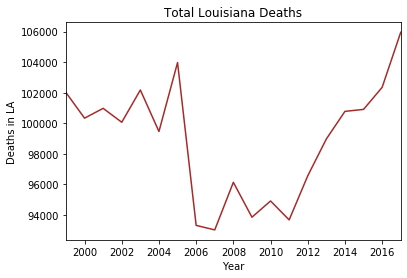

In [18]:
year_info["Deaths"].plot.line(title="Total Louisiana Deaths", color="brown").set_ylabel("Deaths in LA")

Text(0, 0.5, 'Population in LA')

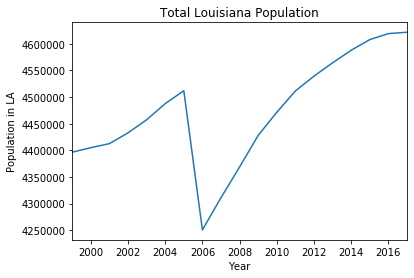

In [19]:
year_info["Population"].plot.line(title="Total Louisiana Population").set_ylabel("Population in LA")

**Analysis**

My first graph shows the changes in deaths and population numbers in Louisiana. It is interesting to note the peak of deaths around 2005 and the drop in population around 2005 which large coinsides with Hurricane Katrina.
Additionally the increase in deaths since 2012 is likely correlated to the increase in population since 2012 as more people move back to Louisiana.

### B: Louisiana Crude Mortality Rate

Perhaps more interesting and meaningful is the Crude Mortality Rate. The Crude Mortality Rate normalizes the death rates based on the population in a given year. The crude mortality rate for the entire state ranges between 20 and 23 deaths per 1,000 people. This is not age-adjusted so is higher than usually displayed values.

Text(0, 0.5, 'Crude Mortality Rate Per 1,000')

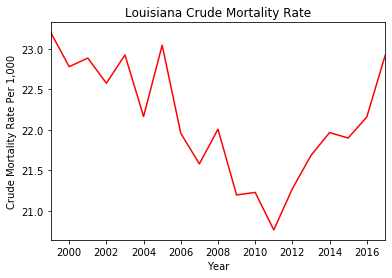

In [20]:
year_info["Crude Mortality Rate"] = (year_info["Deaths"] / year_info["Population"]) * 1000
year_info["Crude Mortality Rate"].plot.line(title="Louisiana Crude Mortality Rate", color="red").set_ylabel("Crude Mortality Rate Per 1,000")

### C: Absolute Death Counts by Age for years 1999-2017, Louisiana

The next way I want to explore this data is by looking at the total death counts by age range for all the years in the dataset. This abstracts a lot of the data and just gives you the general counts. For each year, I computed these numbers by boolean masking to get data only from that year. Then I grouped by the Age Range column to get the sum of the death counts.

In [21]:
age_counts = pd.DataFrame()

In [22]:
for year in range(1999,2018):
    age_counts[str(year)] = deaths_df[deaths_df["Year"] == year].groupby("Age Range").Deaths.sum()
    
    
age_counts

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Age Range,,,,,,,,,,,,,,,,,,,
1-4,154,210,227,207,129,160,182,84,139,160,129,95,136,93,92,169,168,137,134
15-24,1693,1842,1702,1858,1895,2019,2045,1906,1856,1851,1578,1444,1296,1278,1362,1299,1355,1425,1479
25-34,1855,1780,2003,2082,2097,2260,2349,2388,2544,2141,2020,2252,2101,2094,2275,2400,2401,2619,2698
35-44,4241,4133,4317,4187,4391,4132,4298,3864,3883,3531,3316,3403,3112,3214,3375,3288,3413,3620,3955
45-54,7529,7857,8148,8202,8771,8829,9495,8886,8585,9151,8965,8728,8589,8462,8329,8652,8086,8044,7686
5-14,326,296,277,288,182,300,274,165,189,208,167,137,172,156,126,134,185,162,127
55-64,11665,12091,12126,12187,12815,12735,13740,13057,13060,13888,13942,14245,14390,15244,16313,16782,16977,17149,17551
65-74,20949,19846,19318,18776,18873,18132,18318,16738,16436,16807,17353,17551,17611,18857,19378,19963,20255,21011,22182
75-84,28312,27455,28453,28227,28324,27636,27813,24531,23896,24614,23731,23820,22816,23085,23365,23543,23284,23091,24136


The following cell helps reorder the index of the above. It was unfortunate that the 5-14 age range was not in order. Thus I utilized pandas to turn a object variable into a categorical variable. Then when I call sort_index(), it properly sorts the categorical variables as I would like.

In [23]:
order = ["1-4", "5-14", "15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"]
age_counts.index = pd.Categorical(age_counts.index, order)

age_counts.sort_index(inplace=True)
age_counts

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1-4,154,210,227,207,129,160,182,84,139,160,129,95,136,93,92,169,168,137,134
5-14,326,296,277,288,182,300,274,165,189,208,167,137,172,156,126,134,185,162,127
15-24,1693,1842,1702,1858,1895,2019,2045,1906,1856,1851,1578,1444,1296,1278,1362,1299,1355,1425,1479
25-34,1855,1780,2003,2082,2097,2260,2349,2388,2544,2141,2020,2252,2101,2094,2275,2400,2401,2619,2698
35-44,4241,4133,4317,4187,4391,4132,4298,3864,3883,3531,3316,3403,3112,3214,3375,3288,3413,3620,3955
45-54,7529,7857,8148,8202,8771,8829,9495,8886,8585,9151,8965,8728,8589,8462,8329,8652,8086,8044,7686
55-64,11665,12091,12126,12187,12815,12735,13740,13057,13060,13888,13942,14245,14390,15244,16313,16782,16977,17149,17551
65-74,20949,19846,19318,18776,18873,18132,18318,16738,16436,16807,17353,17551,17611,18857,19378,19963,20255,21011,22182
75-84,28312,27455,28453,28227,28324,27636,27813,24531,23896,24614,23731,23820,22816,23085,23365,23543,23284,23091,24136
85+,25289,24827,24409,24055,24702,23263,25459,21707,22441,23791,22660,23247,23462,24084,24362,24552,24787,25096,26008


Then, this data is easily graphed with a bar graph since it simply showing counts. Now that the age range categories are properly ordered, you can easily see the relation between age and death counts in Louisiana for sets of 6 years at a time.

Here you can see each year and each age group, and the y-axis are shared among all three graphs.

The last graph displays all years in one graph just so the overall trend can be seen.

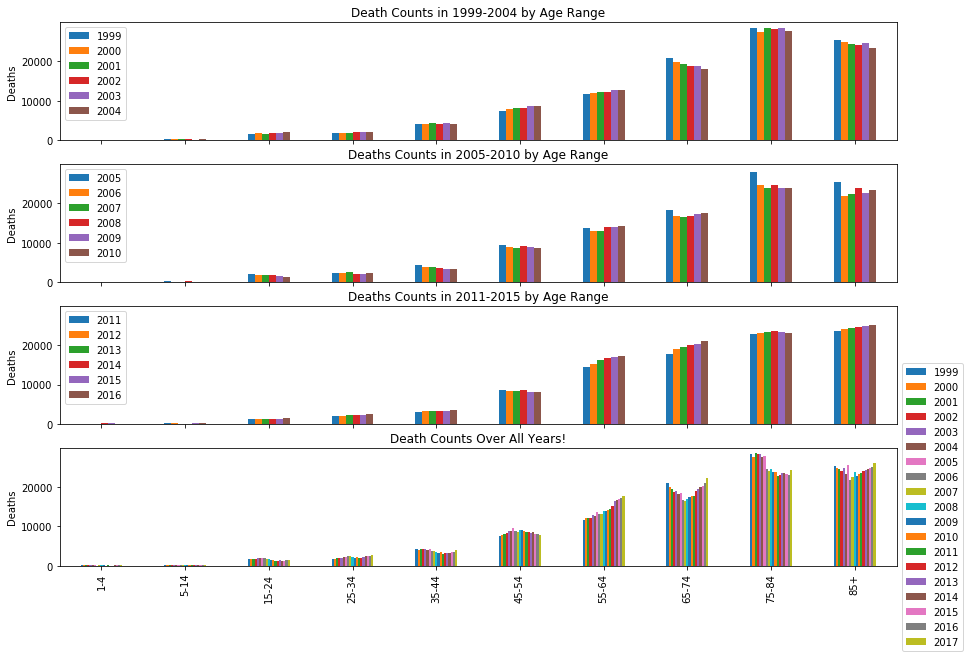

In [24]:
fig, ax = plt.subplots(4, 1, figsize=(15,10), sharey=True, sharex=True)

age_counts[["1999","2000","2001", "2002","2003","2004"]].plot.bar(title="Death Counts in 1999-2004 by Age Range",
                                                                  ax=ax[0]).set_ylabel("Deaths")

age_counts[["2005","2006","2007", "2008","2009","2010"]].plot.bar(title="Deaths Counts in 2005-2010 by Age Range", 
                                                                  ax=ax[1]).set_ylabel("Deaths")

age_counts[["2011","2012","2013", "2014","2015","2016"]].plot.bar(title="Deaths Counts in 2011-2015 by Age Range", 
                                                                  ax=ax[2]).set_ylabel("Deaths")

a = age_counts.plot.bar(title="Death Counts Over All Years!", ax=ax[3]).set_ylabel("Deaths")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Analysis**

From these graphs we can see three main things. We can see how absolute death counts compare across age groups, we can see how death counts trend over smaller 6 year intervals, and we can see how death counts trend over the last 17 years.

Here, we are able to see that the death counts increase with each age group. This is to be expected as the aging populations increase. In the first three plots, we see a decrease in death counts for people over 65 in each year 1999-2004, mixed results in this age demographic in the years of 2005-2010, and increases in deaths over the years 2011-2016. However, looking at the 65-74 group and 85+ group the levels are very similar to how they were in 1999. They were decreasing until around 2006 and they began growing after that.

Another interesting thing in how in the 55-64 age group, death counts have steadily increased over the last 17 years. Alternatively, in the 75-84 age group, there was a sharp drop after 2005. 

I think a lot of the death rates centers around Katrina and the people who perished in that catastrope, the decrease in population following Katrina, and the hesitant individuals who began to return.

### D: Age-Specific Mortality Rates in 1999-2017, Louisiana

The previous plots showed absolute death rates but they do not paint as clear a picture as motality rates. These rates divide the death counts by the population in attempts to normalize the deaths across time with varying populations. The following rates are all at a rate of per 1,000 people which is the public health standard according to the CDC website.

Again we take the sum of the `Deaths` column since those have individual counts for cause categories adn we take the mean of the `Population` column since for each year the population column holds the same number repeated for each row.

In [25]:
cmr = pd.DataFrame()

for year in range(1999,2018):
    deaths_yr = deaths[deaths["Year"] == year].groupby("Age Range").Deaths.sum()
    total_pop_yr = deaths[deaths["Year"] == year].groupby("Age Range").Population.mean()

    cmr[str(year)] = (deaths_yr / total_pop_yr) * 1000
cmr

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Age Range,,,,,,,,,,,,,,,,,,,
1-4,0.608571,0.829056,0.902861,0.813817,0.502571,0.620896,0.704165,0.355944,0.592387,0.658878,0.516837,0.376419,0.536502,0.368645,0.372125,0.684119,0.677062,0.551928,0.536902
15-24,2.449246,2.663713,2.425414,2.625295,2.668409,2.828484,2.881199,2.907624,2.800199,2.787210,2.369330,2.171141,1.958162,1.941287,2.078215,1.998299,2.109813,2.262332,2.387984
25-34,3.048069,2.960932,3.411028,3.560319,3.586222,3.818580,3.917984,4.262292,4.417771,3.611874,3.292546,3.583516,3.271424,3.206949,3.435809,3.584080,3.551371,3.842103,3.969474
35-44,6.090704,5.972837,6.334640,6.254313,6.673090,6.362767,6.732298,6.529454,6.621963,6.119764,5.836528,6.027287,5.562119,5.744353,5.999413,5.809721,5.979212,6.303930,6.837261
45-54,13.198514,13.401652,13.324481,13.204476,13.845697,13.681733,14.448690,14.048945,13.356982,14.069046,13.705311,13.337918,13.303821,13.353764,13.359853,14.108347,13.418453,13.592039,13.272915
5-14,0.472668,0.432311,0.412408,0.434402,0.276112,0.459412,0.423508,0.277478,0.314398,0.344374,0.274565,0.223419,0.279034,0.251383,0.202373,0.215642,0.299568,0.262987,0.207462
55-64,31.253684,31.898335,31.204082,29.666721,29.844177,28.469170,29.437790,28.144999,27.073249,27.794233,26.846801,26.598228,25.695281,26.890721,28.240235,28.547322,28.411963,28.438479,28.952921
65-74,73.859530,70.145798,68.565304,66.719969,66.722525,63.739810,63.646155,59.881653,57.515590,56.820333,56.790067,56.254287,54.707158,55.192943,54.561632,53.847523,52.478036,52.278003,53.268463
75-84,163.725105,156.592216,159.093069,155.076365,153.668368,148.684564,149.180961,138.173236,133.904906,137.212491,132.338836,132.203333,125.347485,126.279341,126.268631,125.404824,121.813920,118.371071,120.058099


Here we utilize the pandas categorical variable again to make sure the index (age range column) is ordered correctly.

In [26]:
cmr.index = pd.Categorical(cmr.index, order)
cmr.sort_index(inplace=True)

I then gathered the average age-specific mortality rate over all the years in the dataset and stored in an array `cmr_mean`. My first plot of age-specific mortality rate is the average rate to provide a general understanding of the way age-specific mortality rates look for the age brackets specified by the dataset.

The following cells take the mean of all the elements of a age row, create a dataframe from these values, and plot them.

In [27]:
cmr_mean = numpy.array(cmr.mean(axis=1))
cmr_mean

array([5.89983466e-01, 3.19131826e-01, 2.43754508e+00, 3.59643911e+00,
       6.19956072e+00, 1.35806651e+01, 2.86004416e+01, 5.98418304e+01,
       1.38073517e+02, 3.72552165e+02])

In [28]:
cmr_mean_df = pd.DataFrame({'age_ranges': order, 'cmr_mean': cmr_mean})

Text(0, 0.5, 'Death Per 1,000')

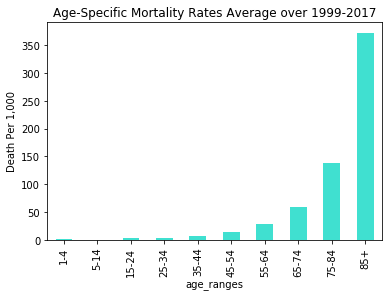

In [29]:
cmr_mean_df.plot.bar(x="age_ranges", title="Age-Specific Mortality Rates Average over 1999-2017", legend=False, color="turquoise").set_ylabel("Death Per 1,000")

While this plot of the average age-specific mortality rates does not allow us to see specific numbers for ages less than about 55 year old, this graph is necessary to give a preliminary understanding of the variance between mortality rates for different ages. Here you see a pretty significant exponential curve. This is likely to do with the vast amount of reasons that could cause death, the lack of resiliancy as people age, and age being the number one risk factor for developing any form of cancer.

The following plots show one age groups and how the mortality rate for that age group has changed over the 17 year period of 1999-2017.

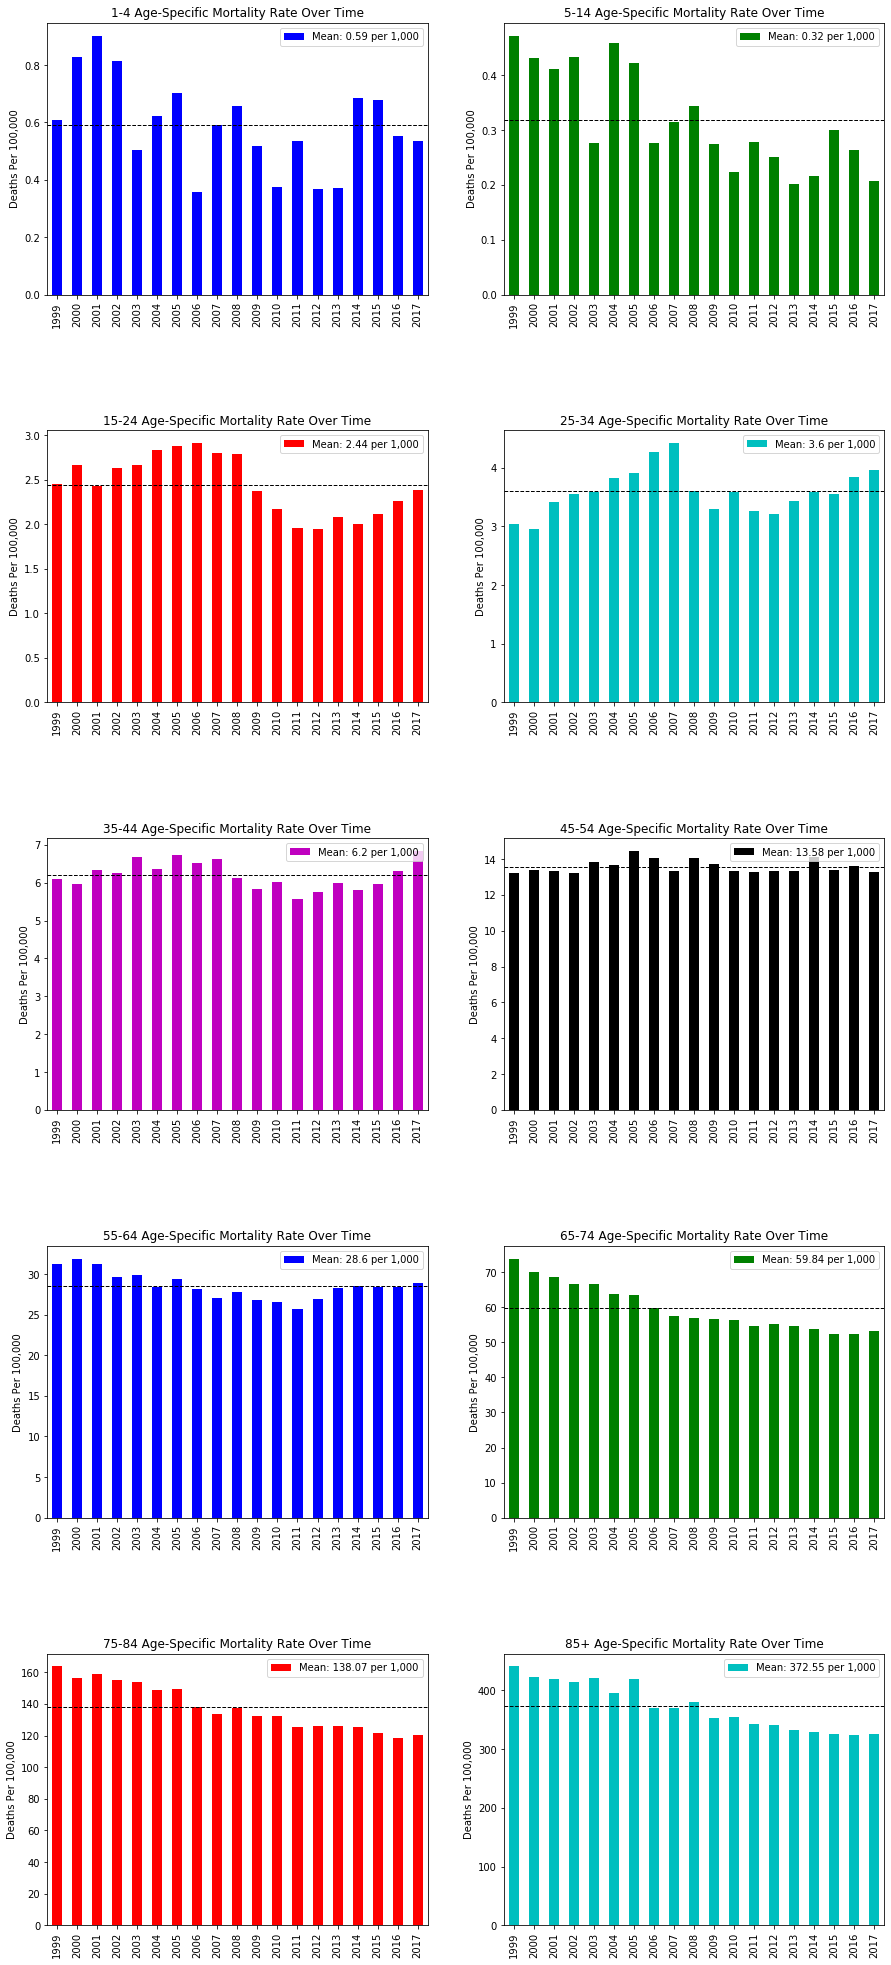

In [30]:
age_ranges = deaths["Age Range"].unique()
cycol = cycle('bgrcmk')

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,35))
for i in range(0,10):
    cmr.loc[age_ranges[i]].plot.bar(title=age_ranges[i]+" Age-Specific Mortality Rate Over Time", 
                                    ax=ax[i // 2][i % 2], 
                                    legend=True, 
                                    label="Mean: " + str(round(cmr_mean[i],2)) + " per 1,000", 
                                    color=next(cycol)
                                   ).set_ylabel("Deaths Per 100,000")
    
    #Adding black dashed line which indicates the mean mortality rate
    ax[i // 2][i % 2].axhline(y=cmr_mean[i] ,color='black', linewidth=1, ls="--")

plt.subplots_adjust(hspace=0.5)

**Analysis**

Alternatively to the absolute death counts, for the Age-specific Mortality Rate, I have plotted the information (which in total consists of year, age range, and the rate) by age range. The age-specific mortalitiy rates vary so drastically that when I plotted them all on one graph or separated by year, the 85+ age range and their average CMR of ~370 per 1,000 persons made the 1-4 age range average CMR of 0.59 deaths per 1,000 very small on the plot. It was not showing the information I sought to display and compare visually.

So the above 10 plots are just for one age bracket over time. Since the mortality are so low in younger age brakets, the graphs have more variance in them. Quite fasinating is that for ages 65 and older, the mortality rates over all years inspected show a general trend of decreasing mortality year after year.

I am additionally shocked that there was not more of an impact surrounding 2005 and the Katrina disaster which was so prominant from non-normalized data plots.

### E: Cause-Specific Mortality Rates

The next public health statistic that is usually provided is cause-specific mortality rates. As show below there are 103 causes that had significant enough numbers to have their own category and not fall into a "catch all" type of category like "All other disorders" or "All other diseases".

After grouping by Year and Cause, the sum of the `Deaths` column provides the counts of death by year and cause across all ages.

In [55]:
deaths.Cause.unique().size

103

In [58]:
deaths["Year"] = pd.to_numeric(deaths["Year"])
cause_death_counts = pd.DataFrame(deaths.groupby(["Year", "Cause"]).sum()["Deaths"])
cause_death_counts.head()

Deaths
Year Cause                                      
1999 #Accidents (unintentional injuries)    1916
     #Alzheimer disease                      682
     #Anemias                                 54
     #Aortic aneurysm and dissection         237
     #Assault (homicide)                     460

Then, for each year, I added a total Pop column that holds the year's total population as defined in the year_info dataframe. From that total population value and the cause-specific counts, I calculated the cause-specific mortality rate for each cause in each year.

In [60]:
for year in range(1999,2018):
    cause_death_counts.loc[year, "Total Pop"] = year_info.loc[year]["Population"]
    

cause_death_counts["CSMR"] = (cause_death_counts["Deaths"] / cause_death_counts["Total Pop"]) * 100000

cause_death_counts.head()

Deaths  Total Pop       CSMR
Year Cause                                                            
1999 #Accidents (unintentional injuries)    1916  4396502.0  43.580101
     #Alzheimer disease                      682  4396502.0  15.512332
     #Anemias                                 54  4396502.0   1.228249
     #Aortic aneurysm and dissection         237  4396502.0   5.390649
     #Assault (homicide)                     460  4396502.0  10.462863

As part of my exploratory data analysis, I plotted some causes of death from the `Cause` column that looked interesting to me. Here you see Major Cardiovascular Diseases which have an incredibly high mortality rate drastically drop until 2011. They have since been on the rise.

Text(0, 0.5, 'Deaths per 100,000')

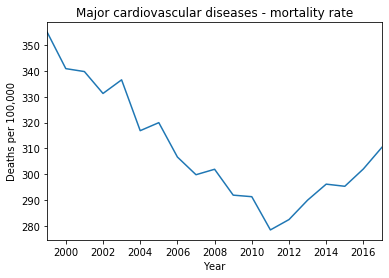

In [62]:
cause_death_counts.xs('Major cardiovascular diseases', level=1)["CSMR"].plot.line(title="Major cardiovascular diseases - mortality rate").set_ylabel("Deaths per 100,000")

Something that is often not discussed is the increasing frequency of deaths due to the underlying cause of nutritional deficiencies. While the numbers are small (2 - 4 deaths per 100,000 people) it is worrisome to see them increasing.

Text(0, 0.5, 'Deaths per 100,000')

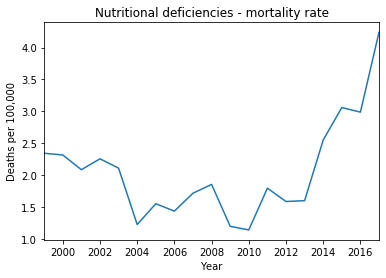

In [63]:
cause_death_counts.xs('#Nutritional deficiencies', level=1)["CSMR"].plot.line(title="Nutritional deficiencies - mortality rate").set_ylabel("Deaths per 100,000")

Something wonderful to see is the sharp decline in deaths attributed to HIV.

Text(0, 0.5, 'Deaths per 100,000')

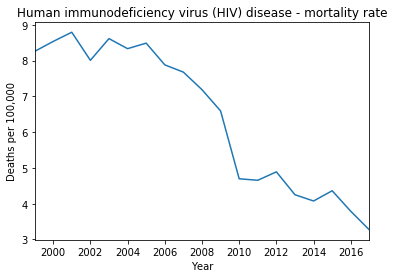

In [64]:
cause_death_counts.xs('#Human immunodeficiency virus (HIV) disease', level=1)["CSMR"].plot.line(title="Human immunodeficiency virus (HIV) disease - mortality rate").set_ylabel("Deaths per 100,000")

---

<p style="text-align: center; font-size: 25px; font-weight: bold;">4. Trends of Death Causes</p>

The first of my research questions for this project sought to understand how the trends of communicable diseases compared to trends of chronic diseases and to trends of injury deaths. All of causes in the `Cause` column can be placed into one of these categories. 

First, I found the leading causes of death by calculating the mean cause-specific mortality rate over all years. Then I sorted the causes by this rate. The leading causes are as follows <br/>
1. Major cardiovascular disease<br/>
2. Malignant neoplasms (Cancer)<br/>
3. Cerebrovascular diseases<br/>
4. Accidents (unintentional injuries)<br/>
5. Chronic lower respiratory diseases<br/>
6. Diabetes mellitus<br/>
7. Alzheimer disease

In [72]:
leading_rates = pd.DataFrame(cause_death_counts.reset_index().groupby("Cause")["CSMR"].mean()).sort_values(by="CSMR", ascending=False)
leading_rates[:20]

,CSMR
Cause,
Major cardiovascular diseases,309.852804
#Diseases of heart,239.934504
#Malignant neoplasms,207.609857
Ischemic heart diseases,137.012747
All other diseases (Residual),83.840810
Other heart diseases,81.216762
Other forms of chronic ischemic heart disease,78.581641
"Malignant neoplasms of trachea, bronchus and lung",60.980679
Acute myocardial infarction,56.477226


My next work began by identifying top causes for the chronic disease, communicable disease, and injury lists. Those lists are as follows. The communicable disease list only has three causes since there are only three diseases that have caused a large enough number that they don't fall into the "All other diseases" category.

Using a for loop, I was able to loop through the lists and plot them with their proper titles.
Then in order to find the general trend of the type of cause over time, I plotted all of the chronic diseases on one plot.
The chronic disease I looked include: Malignat neoplasms or cancer, major cardiovascular disease, cerebrovascular diseases, chronic lower respiratory disease, diabetes, and Alzheimer disease.

In [73]:
chronic_lst = ["#Malignant neoplasms", "Major cardiovascular diseases", "#Cerebrovascular diseases", "#Chronic lower respiratory diseases", "#Chronic liver disease and cirrhosis", "#Alzheimer disease" ]
commun_lst = ["#Human immunodeficiency virus (HIV) disease", "#Viral hepatitis", "#Influenza and pneumonia" ]
injury_lst = ["Motor vehicle accidents", "Accidental drowning and submersion", "#Assault (homicide)", "Accidental poisoning and exposure to noxious substances", "#Intentional self-harm (suicide)", 'Accidental exposure to smoke, fire and flames']

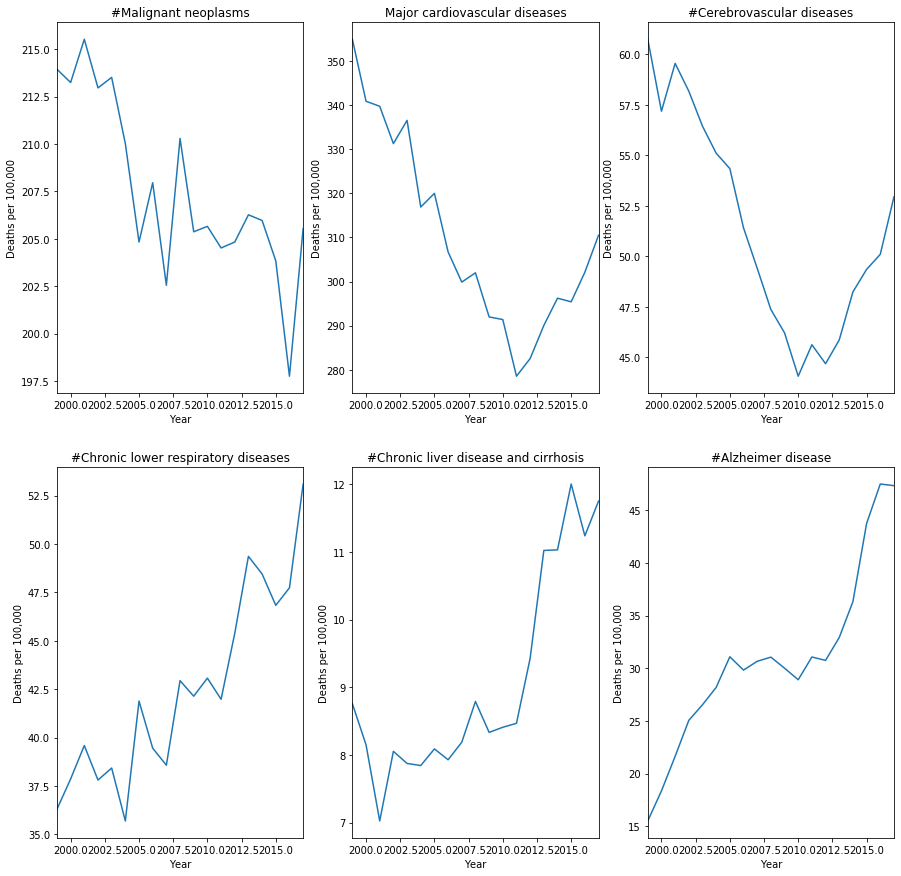

In [74]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,15))
                       
for i in range(len(chronic_lst)):
    cause_death_counts.xs(chronic_lst[i], level=1)["CSMR"].plot.line(title=chronic_lst[i], ax=ax[i // 3][i % 3]).set_ylabel("Deaths per 100,000")

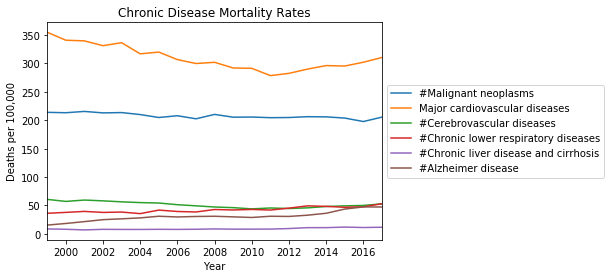

In [75]:
ax = plt.gca()                   
    
for i in range(len(chronic_lst)):
    cause_death_counts.xs(chronic_lst[i], level=1)["CSMR"].plot.line(title="Chronic Disease Mortality Rates", ax=ax, legend=True, label=chronic_lst[i]).set_ylabel("Deaths per 100,000")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
plt.savefig('chronic.png')

From the chronic disease plot of mortality rates over time, we can see multiple things about the trends of chronic diseases. First we can see that major cardiovascular diseases and malignant neoplasms account for the leading causes of death and the third leading cause of death (cerebrovascular diseases) has a drastically lower mortality rate. Generally chronic disease are flatline across 1999 to 2017. The public health discipline is focused on treating chronic diseases but by nature these are diseases that people suffer with for a long time (implying that they do not have an easy or effective treatment). Thus public health efforts at the moment look to decrease risk factors.

The next category of cause of death is communicable or spreadable disease where I evaluated HIV, Viral Hepatitis, and Influenza and Pneumonia as underlying causes of death. 

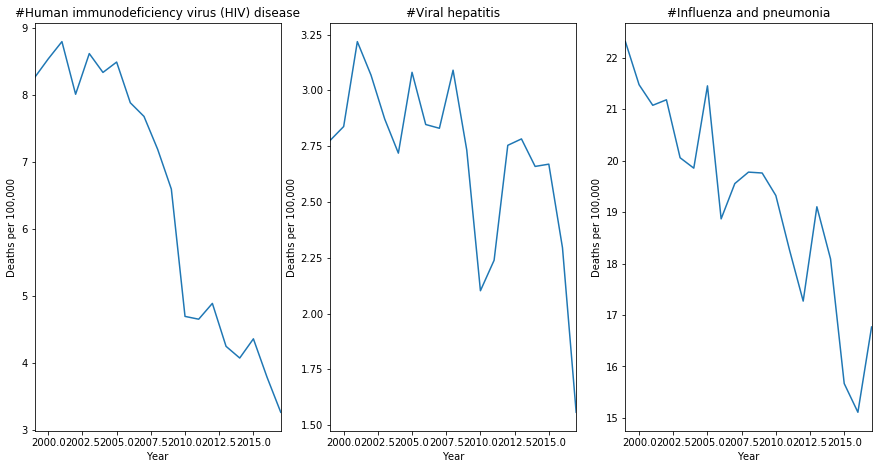

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7.5))
                       
for i in range(len(commun_lst)):
    cause_death_counts.xs(commun_lst[i], level=1)["CSMR"].plot.line(title=commun_lst[i], ax=ax[i]).set_ylabel("Deaths per 100,000")

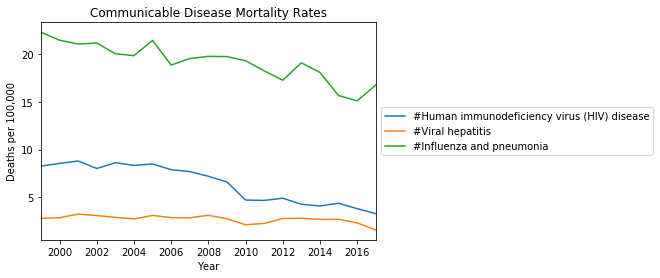

In [47]:
ax = plt.gca()                   
    
for i in range(len(commun_lst)):
    cause_death_counts.xs(commun_lst[i], level=1)["CSMR"].plot.line(title="Communicable Disease Mortality Rates", ax=ax, legend=True, label=commun_lst[i]).set_ylabel("Deaths per 100,000")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
plt.savefig('commun.png')

Of the named categories in the dataset, only three of the causes were communicable diseases. This shows that there are less people dying from communicable disease at the present. Also there is a downward trend that is seen among the communicable diseases listed (those include HIV, Viral Hepatitis, and Influenza and Pneumonia). These rates are noticably lower than the chronic disease rates with the range all underneath 25 deaths per 100,000 people.

Next, I evaluated the injury category of deaths. Injuries include any accidents and bodily harm that do not come from a spreadable disease or longterm condition. The injuries I evaluated included motor vehicle accidents, accidental drowning, assault in the form of homicide, accidental poisoning/exporsure to noxious substances, intentional self-harm in the form of suicide, and accidental exposure to smoke, fire, or flames. These are a wide variety but all fall into the same injury category.

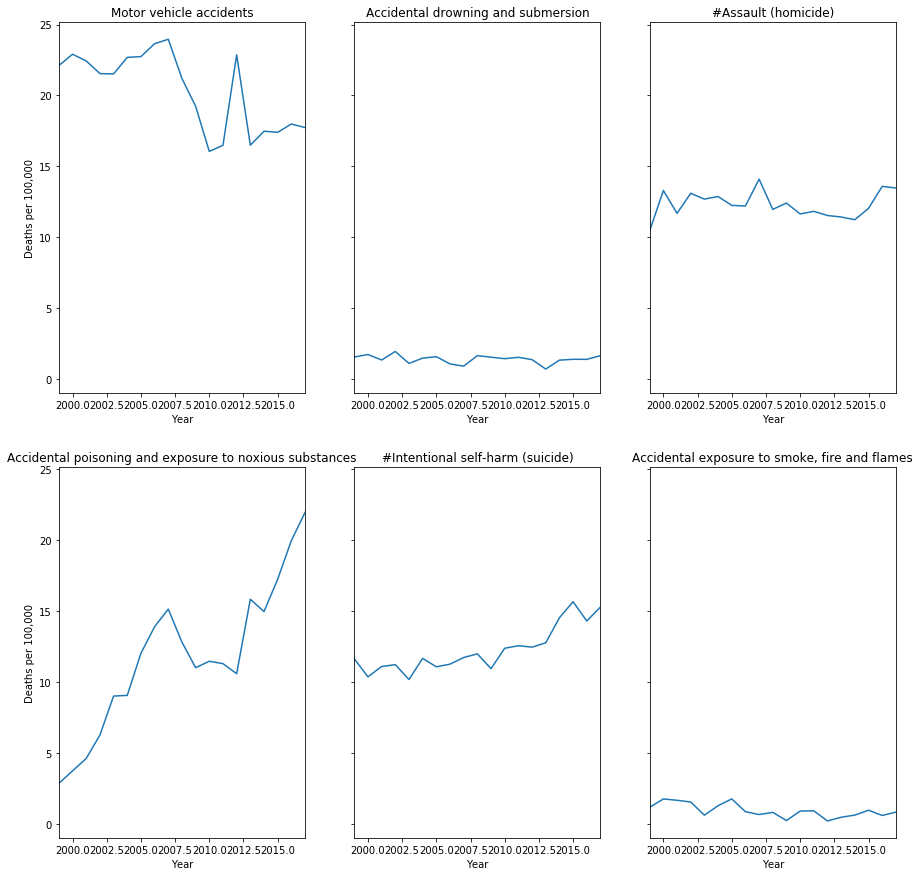

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,15), sharey=True)                 
    
for i in range(len(injury_lst)):
    cause_death_counts.xs(injury_lst[i], level=1)["CSMR"].plot.line(title=injury_lst[i], ax=ax[i//3][i%3]).set_ylabel("Deaths per 100,000")

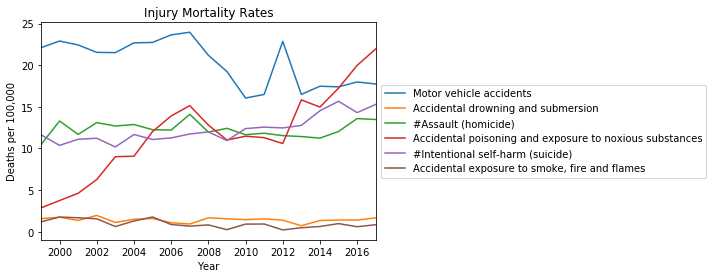

In [84]:
ax = plt.gca()                   
    
for i in range(len(injury_lst)):
    cause_death_counts.xs(injury_lst[i], level=1)["CSMR"].plot.line(title="Injury Mortality Rates", ax=ax, legend=True, label=injury_lst[i]).set_ylabel("Deaths per 100,000")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
plt.savefig('injury.png')

As you can see, these injuries show wide variety on average mortality rate and also wide variety over the time period evaluated. Homicide, accidental exposure to smoke, fire, and flames, and accidental drowning all have fairly similar trends of being relately unchanged over time. Despite advertised efforts to prevent drownings, house fires, and crime these trendlines remain flat. Motor vehicle accident deaths have seen a decrease over time likely due to higher quality standards for vehicles and interventions surrounding seatbelt use and phone use while driving. Oppositely, the accidental poisoning category has seen a large increase in the mortality rate over time. 

----

<p style="text-align: center; font-size: 25px; font-weight: bold;">5. Evaluation of TU Undergraduate Public Health Program</p>

For my second research question, I wanted to look at if the Tulane University School of Public Health Undergraduate Program accurately portrays (through its classes) the issues that are actually causing death within the state of Louisiana. The five causes of death that I have chosen to evaluate include heart diseases, the opioid epidemic, mental health, violence and crime, and Hepatitis C. 

This evaluation uses the above plots of the three categories and below plots the causes I have specifically looked at. The plots below are not as helpful since they do not show the relationship of that one causes to other similar causes.

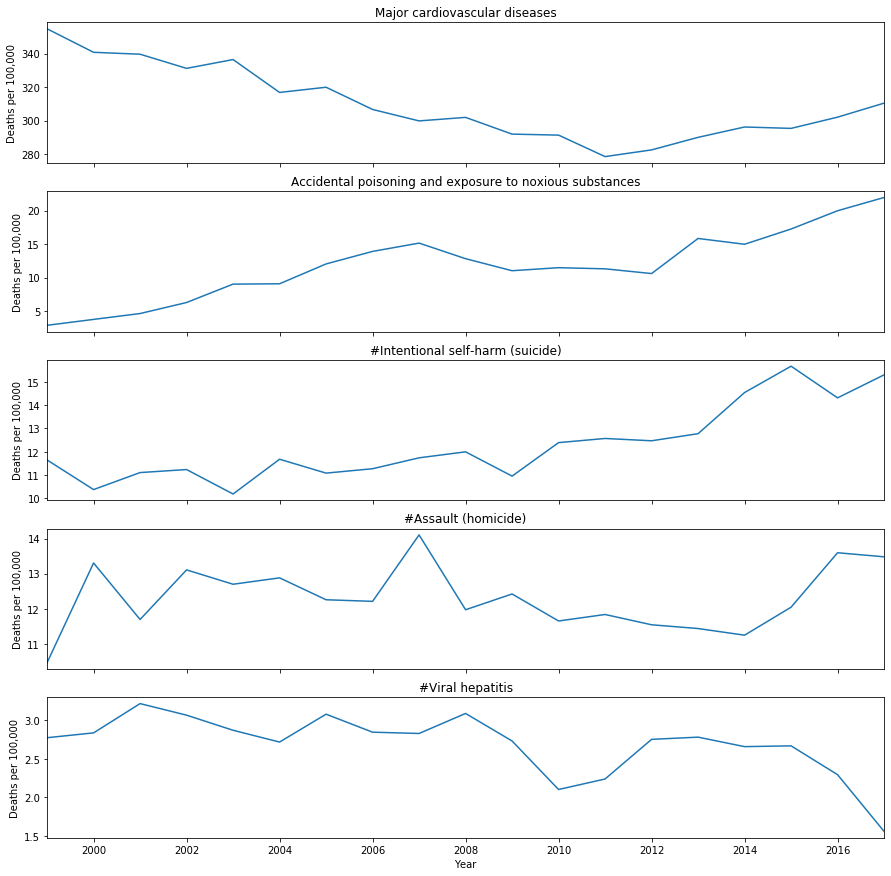

In [94]:

study_lst = ["Major cardiovascular diseases", "Accidental poisoning and exposure to noxious substances", "#Intentional self-harm (suicide)", "#Assault (homicide)", "#Viral hepatitis"]

fig, ax = plt.subplots(5, 1, figsize=(15,15), sharex=True)                 
    
for i in range(len(study_lst)):
    cause_death_counts.xs(study_lst[i], level=1)["CSMR"].plot.line(title=study_lst[i], ax=ax[i]).set_ylabel("Deaths per 100,000")

From the above graphs, we can draw certain conclusions that help us evaluate the Tulane program. 

Our classes spend a lot of time covering heart diseases and the many risk factors that lead to heart disease such as older age, being overweight, having a sedentary lifestyle, etc. This is revelent to study since it is not only the leading cause of death in Louisiana but it has a mortality rate significantly higher that the second and third leading cause of death. It is also particularly worrisome since the trend as of the last five years is an increasing mortality rate.

The second topic that our public health classes talk a lot about is the Opioid Crisis in America. Opioid overdose falls into the category of "Accident poisoning or exposure to noxious substance". This is seen very clearly as an issue in the plot above due to its upward trend but what becomes even more apparent in the "Injury Mortality Rates" plot is that this issue has significantly risen as a cause of death overtaking other causes in the number of people affected. It cuts right across the plot. The rapid growth of this causes mortality rate in the last 18 years is shocking and therefore I am proud of the public health school's focus and commitment to mitigating to this epidemic.

The third topic of mental health (in this case through the view of suicide since our dataset only offers information about deaths). Alarmingly, suicide rates have increased and this really does not really reflect the sentiments of my classes. We focus on the decrease in stigma surrounding mental health and also interventions that improve access to mental health resources. This difference in my understanding and the true levels of mental health deaths in Louisana might come from the school's emphasis on resources available to students or people in the big city of New Orleans but does not take into account the resources (or lack thereof) that the rest of the state has.

The fourth topic is violence and crime and in here we can look at assault (homicides) as the proxy for violence in Louisiana. There is an interesting peak in 2007 and as of late the rates of homicide are increasing. This again goes against the general rhetoric of the public health classes which focus on all of the work that has been does to mitigate violence in the city. Clearly these interventions have not been that successful at reducing the rates of homicide and that is something the Tulane classes have not accurately protrayed.

Finally, I chose to look at hepatitis rates within Louisiana. We spend alot of time talking about Hep C in classes and especially more recently in conjuction with the opioid epidemic and intravenous drug use. I am pleasantly surprised then to see that viral hepatitis death rates are both relatively low (under 5 deaths per 100,000 people) but also trending downward. I think this is one topic that is receives and disproportionate amount of time being discussed for the relatively small population it affects. While every death is notable and devestating, energy might be better used looking into other issues. However, public health focus might be placed on Hep C due to the likelihood that interventions may be effective. In this way it is worthy to easily save some lives.


---

<p style="text-align: center; font-size: 25px; font-weight: bold;">6. Conclusion and Further Study</p>

Ultimately, the trends of communicable diseases and chronic diseases matched my hypothesis that as we advance as a country, we have mitigated communicable diseases that cause serious mortality and thus we are seeing an increase/static amount of chronic diseases as people live longer. Unfortunately some of the public health interventions that target chronic diseases and injuries seem less effective than portrayed in our undergraduate classes. 

However, larger than Tulane University, the state of Louisiana has a duty to use the statistics to evaluate its own performance. For the scope of this project, I was not able to do all of the research about the reasoning behind the varying mortality rates for certain causes of death over time; however, I hope this notebook provides a small understanding about the general kinds of disease, disorder, and injury that plague our state. 